In [ ]:
# 1. Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display plots inline
%matplotlib inline

# 2. Load Data
df = pd.read_csv('../../data/benin-malanville.csv', parse_dates=['Timestamp']) 
df.head() 


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
# 3. Summary stats
display(df.describe().T)

# Missing-value report
missing = df.isna().sum()
pct_missing = (missing / len(df)) * 100
pd.DataFrame({'missing_count': missing, 'pct_missing': pct_missing}).query('pct_missing > 0')


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-02-07 12:00:30.000000512,2021-08-09 00:01:00,2021-11-08 06:00:45,2022-02-07 12:00:30,2022-05-09 18:00:15,2022-08-09 00:00:00,NaN
GHI,525600.0,240.559452,-12.9,-2.0,1.8,483.4,1413.0,331.131327
DNI,525600.0,167.187516,-7.8,-0.5,-0.1,314.2,952.3,261.710501
DHI,525600.0,115.358961,-12.6,-2.1,1.6,216.3,759.2,158.691074
ModA,525600.0,236.589496,0.0,0.0,4.5,463.7,1342.3,326.894859
ModB,525600.0,228.883576,0.0,0.0,4.3,447.9,1342.3,316.536515
Tamb,525600.0,28.179683,11.0,24.2,28.0,32.3,43.8,5.924297
RH,525600.0,54.487969,2.1,28.8,55.1,80.1,100.0,28.073069
WS,525600.0,2.121113,0.0,1.0,1.9,3.1,19.5,1.603466
WSgust,525600.0,2.809195,0.0,1.3,2.6,4.1,26.6,2.02912


,missing_count,pct_missing
Comments,525600,100.0


In [5]:
from scipy.stats import zscore

cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
zs = df[cols].apply(zscore, nan_policy='omit')
outliers = (zs.abs() > 3)

# Flag rows with any outlier
df['outlier_flag'] = outliers.any(axis=1)

# How many outliers?
df['outlier_flag'].sum(), len(df)

# Drop or impute
# e.g., median imputation
for c in cols:
    median = df.loc[~outliers[c], c].median()
    df.loc[df[c].isna() | outliers[c], c] = median


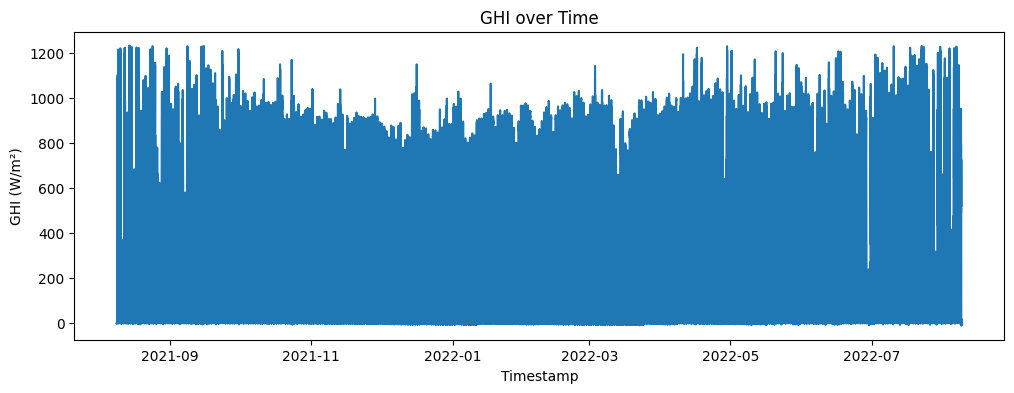

C:\Users\USER\AppData\Local\Temp\ipykernel_6712\1233816945.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Timestamp')['GHI'].resample('M').mean()


Text(0.5, 1.0, 'Average Monthly GHI')

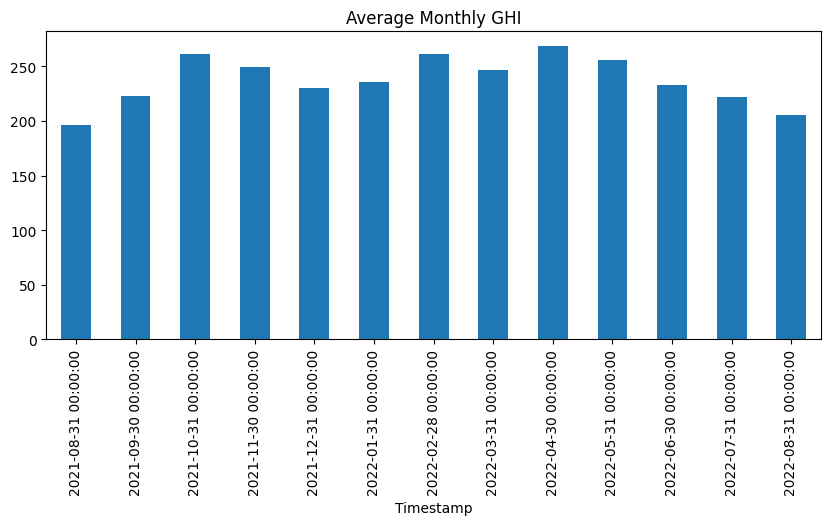

In [6]:
# Plot global irradiance over time
plt.figure(figsize=(12,4))
plt.plot(df['Timestamp'], df['GHI'])
plt.title('GHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.show()

# You can also resample by month:
monthly = df.set_index('Timestamp')['GHI'].resample('M').mean()
monthly.plot(kind='bar', figsize=(10,4))
plt.title('Average Monthly GHI')


Text(0.5, 1.0, 'Cleaning Impact')

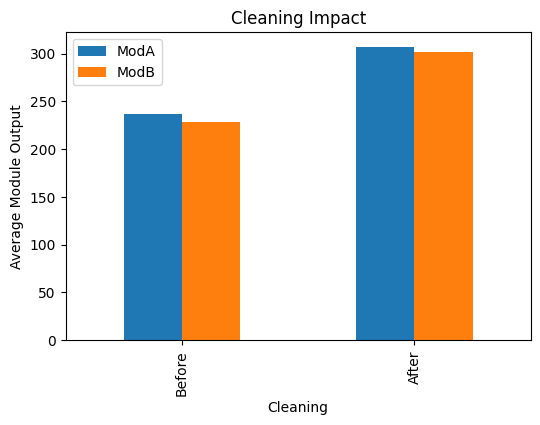

In [7]:
# Compare module readings pre/post cleaning
grouped = df.groupby('Cleaning')[['ModA','ModB']].mean().reset_index()
grouped.plot(x='Cleaning', kind='bar', figsize=(6,4))
plt.xticks([0,1], ['Before','After'])
plt.ylabel('Average Module Output')
plt.title('Cleaning Impact')


Text(0.5, 1.0, 'WS vs GHI')

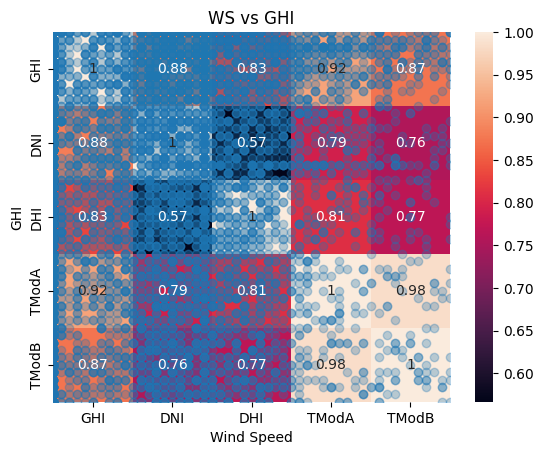

In [8]:
# Heatmap
corr = df[['GHI','DNI','DHI','TModA','TModB']].corr()
sns.heatmap(corr, annot=True)

# Scatter examples
plt.scatter(df['WS'], df['GHI'], alpha=0.3)
plt.xlabel('Wind Speed'); plt.ylabel('GHI')
plt.title('WS vs GHI')


Text(0.5, 1.0, 'GHI Distribution')

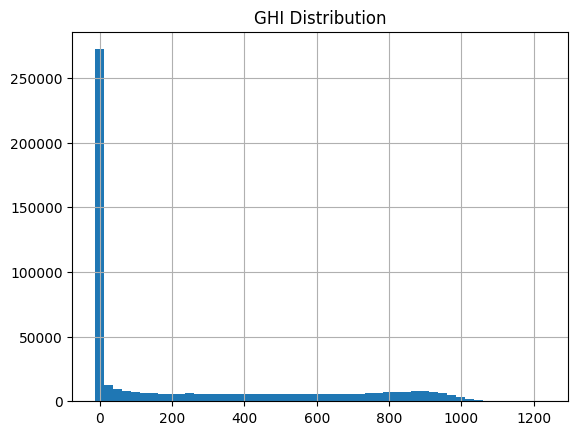

In [9]:
# Histogram of GHI
df['GHI'].hist(bins=50)
plt.title('GHI Distribution')

# Wind rose (via windrose library if you install it)
# from windrose import WindroseAxes
# ax = WindroseAxes.from_ax()
# ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
# ax.set_legend()


Text(0.5, 1.0, 'Relative Humidity vs Ambient Temp')

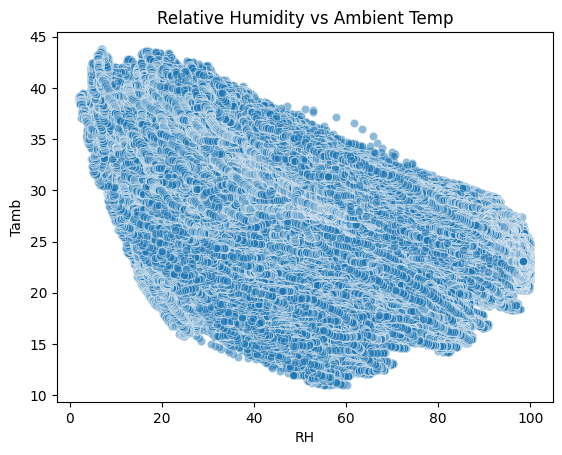

In [10]:
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.5)
plt.title('Relative Humidity vs Ambient Temp')


Text(0.5, 1.0, 'GHI vs Tamb (bubble = RH)')

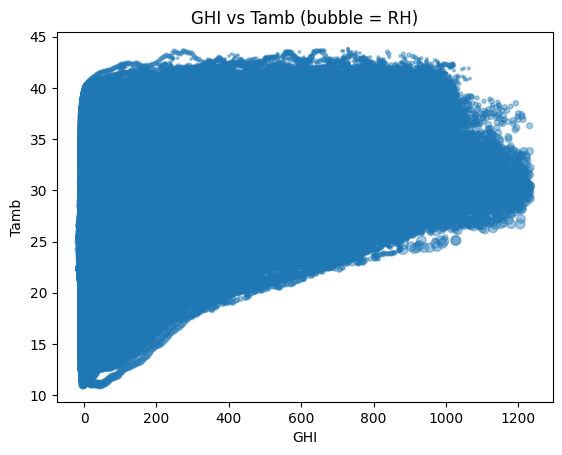

In [11]:
plt.scatter(
    df['GHI'], df['Tamb'],
    s=df['RH'] * 0.5,  # scale bubble by RH
    alpha=0.4
)
plt.xlabel('GHI'); plt.ylabel('Tamb')
plt.title('GHI vs Tamb (bubble = RH)')


In [ ]:
df.to_csv('../../data/benin-malanville_clean.csv', index=False)
